LGM VIP Data Science

June 2022 

03 ADVANCED LEVEL TASK - 01 Develop A Neural Network That Can Read Handwriting

Name - Praveen jha

In [14]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

(60000, 28, 28)
5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

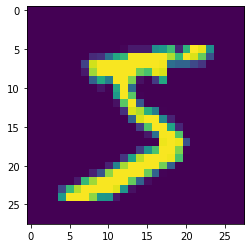

In [4]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(x_train.shape)
print(y_train[0])
print(x_train[0])

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
model = tf.keras.models.Sequential([
                                    
tf.keras.layers.Flatten(input_shape = (28,28)),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [7]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.99):
      print("/nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

In [8]:
callbacks = myCallback()

In [9]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train , epochs = 10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2008 - accuracy: 0.9410
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0800 - accuracy: 0.9756
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0517 - accuracy: 0.9839
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0374 - accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0277 - accuracy: 0.9907


In [11]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0609 - accuracy: 0.9806


[0.06090099364519119, 0.9805999994277954]

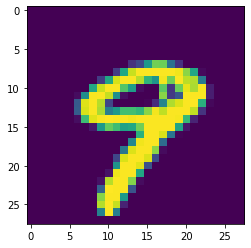

In [12]:
plt.imshow(np.squeeze(x_test[9]))

In [13]:
prediction = model.predict(x_test)
print(np.argmax(prediction[9]))

9
